# Malcolm MacLeod

## Research question/interests

My research interests revolve around what seasonal variations exist on Mars. I will look at the temperature, pressure and 
solar longtitude (ls) which helps determine the solstices and equinoxs. Looking at the the temperature variations throughout Mar's year, I want to see if the temperatures decline or rise when nearing summer and winter parts of the year. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

df = pd.read_csv('../data/raw/mars-weather.csv')

In [2]:
df

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny
...,...,...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,NaN,Sunny
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,NaN,Sunny
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0,NaN,Sunny
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN,NaN,Sunny


# Task 1

In [3]:
df.shape

(1894, 10)

In [4]:
df.columns

Index(['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'max_temp',
       'pressure', 'wind_speed', 'atmo_opacity'],
      dtype='object')

In [5]:
df.nunique(axis=0)

id                  1894
terrestrial_date    1894
sol                 1894
ls                   360
month                 12
min_temp              29
max_temp              46
pressure             199
wind_speed             0
atmo_opacity           2
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1894.0,948.372228,547.088173,1.0,475.25,948.5,1421.75,1895.0
sol,1894.0,1007.930306,567.879561,1.0,532.25,1016.5,1501.75,1977.0
ls,1894.0,169.180570,105.738532,0.0,78.00,160.0,259.00,359.0
min_temp,1867.0,-76.121050,5.504098,-90.0,-80.00,-76.0,-72.00,-62.0
max_temp,1867.0,-12.510445,10.699454,-35.0,-23.00,-11.0,-3.00,11.0
pressure,1867.0,841.066417,54.253226,727.0,800.00,853.0,883.00,925.0
wind_speed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Task 2-3:

In [7]:
import project_functions3 as p3

In [8]:
data = pd.read_csv('../data/raw/mars-weather.csv')
dfu = p3.unprocessed(data)
dfu

,id,terrestrial_date,sol,ls,month,min_temp,max_temp,pressure,wind_speed,atmo_opacity
0,1895,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,NaN,Sunny
1,1893,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,NaN,Sunny
2,1894,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,NaN,Sunny
3,1892,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,NaN,Sunny
4,1889,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,NaN,Sunny
...,...,...,...,...,...,...,...,...,...,...
1889,24,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,NaN,Sunny
1890,13,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,NaN,Sunny
1891,2,2012-08-16,10,155,Month 6,-75.0,-16.0,739.0,NaN,Sunny
1892,232,2012-08-15,9,155,Month 6,NaN,NaN,NaN,NaN,Sunny


In [9]:
dfp = p3.load_and_process(data)
dfp

,earth_date,sol,ls,month,min_temp,max_temp,pressure,Season
0,2018-02-27,1977,135,Month 5,-77.0,-10.0,727.0,Winter
1,2018-02-26,1976,135,Month 5,-77.0,-10.0,728.0,Winter
2,2018-02-25,1975,134,Month 5,-76.0,-16.0,729.0,Winter
3,2018-02-24,1974,134,Month 5,-77.0,-13.0,729.0,Winter
4,2018-02-23,1973,133,Month 5,-78.0,-18.0,730.0,Winter
...,...,...,...,...,...,...,...,...
1887,2012-08-20,14,157,Month 6,-74.0,-16.0,740.0,Winter
1888,2012-08-19,13,157,Month 6,-74.0,-15.0,732.0,Winter
1889,2012-08-18,12,156,Month 6,-76.0,-18.0,741.0,Winter
1890,2012-08-17,11,156,Month 6,-76.0,-11.0,740.0,Winter


# Task 4

In [10]:
dfp.describe().T

,count,mean,std,min,25%,50%,75%,max
sol,1867.0,1015.670059,565.342298,10.0,546.5,1028.0,1505.5,1977.0
ls,1867.0,168.865024,105.599153,0.0,78.0,160.0,257.5,359.0
min_temp,1867.0,-76.121050,5.504098,-90.0,-80.0,-76.0,-72.0,-62.0
max_temp,1867.0,-12.510445,10.699454,-35.0,-23.0,-11.0,-3.0,11.0
pressure,1867.0,841.066417,54.253226,727.0,800.0,853.0,883.0,925.0


- The maximum temperature of max_temp is 11 degrees celsius. 
- The minimum temperature is -90 degree celsius! 
- It generally stays below zero on Mars as seen by the mean max_temp. 

<AxesSubplot:>

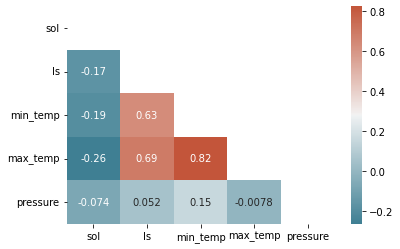

In [30]:
corr = dfp.corr()
# Method of diagonalization from stack overflow: https://stackoverflow.com/questions/57414771/how-to-plot-only-the-lower-triangle-of-a-seaborn-heatmap/65455988#65455988
matrix = np.triu(corr)
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True), mask=matrix)

We can see there is a positive correlation between ls (Solar Longitude) and the max and minimum temperatures. Solar longitude or also called Mars-sun angle which determines what season it is. 

### Scatter plot

Text(0.5, 1.0, 'Seasonal variations by temperature')

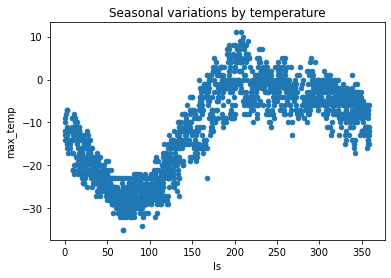

In [12]:
sp = dfp.plot(kind = 'scatter', x= 'ls', y='max_temp')
sp.set_title('Seasonal variations by temperature')

- 0 < ls < 90: Autumn 
- 90 < ls < 180: Winter
- 180 < ls < 270: Spring
- 270 < ls < 360: Summer

We can see here that there are seasonal variations. 
Between 0 and 90 the temperature dips to its lowest point, and gradually increases to its hottest around of 11 degrees at an ls of 250. These temperature variations follow an S curve showing the the different seasons. 

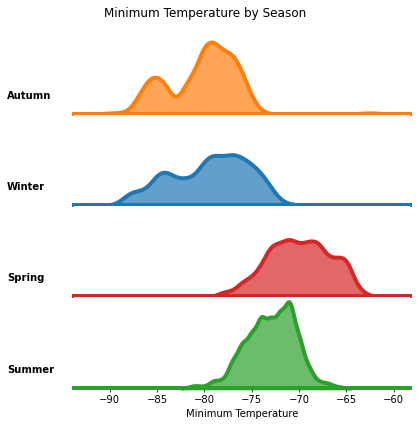

In [29]:
order_dfp = ['Autumn','Winter','Spring','Summer']
def label(x, color, label):
    ax = plt.gca()
    ax.text(-0.2, .2, label, fontweight="bold", color="black",
            ha="left", va="center", transform=ax.transAxes)

r_plot = sns.FacetGrid(dfp, row='Season', hue='Season',aspect=4, height=1.5, row_order=order_dfp)

r_plot.map(sns.kdeplot, 'min_temp',clip_on=False,
      shade=True, alpha=0.7, lw=4, bw_method=0.2)
r_plot.map(plt.axhline, y=0, lw=4, clip_on=False)
r_plot.map(label, "min_temp")

r_plot.fig.subplots_adjust(hspace=0.01)
r_plot.set_titles("")
plt.suptitle('Minimum Temperature by Season', y=0.98)
r_plot.set(yticks=[])
r_plot.despine(bottom=True, left=True)
r_plot.set_axis_labels("Minimum Temperature", "")

- Winter and Autumn experience the coldest temperatures. 
- Autumn seems to experience lower temperatures more than winter. 
- The minimum temperature in the Spring and Summer rarely goes below -80° Celsius. 
- Spring seems to stay a little warmer then summer overrall. 
- This shows that throughout the year Mars experiences seasons. 

# Conclusion

Overrall we can see seasonal variations from the data provided. Using the solar longitude (ls) as a marker for the seasons we can see Mars moves through seasons similar to Earth where the temperature drops when nearing autumn and winter and increases from spring to summer. However, it stays much colder on that planet then ours and it generally below zero. 

In [16]:
dfp.to_csv('mars_data.csv')